In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

* Download the csv file from WorldBank
* It should actually give you a zip with the csv inside
* Put the zip file into the same folder as your data analysis

In [2]:
# unzip - '!' executes a terminal command rather than Python
!unzip API_PAK_DS2_en_csv_v2_323225.zip

Archive:  API_PAK_DS2_en_csv_v2_323225.zip
replace Metadata_Indicator_API_PAK_DS2_en_csv_v2_323225.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


Looks like it gives us three files

Use df.head() to look at the format of the data

In [3]:
# df stands for 'dataframe'
gdp_metadata_df = pd.read_csv('Metadata_Indicator_API_PAK_DS2_en_csv_v2_323225.csv')
country_metadata_df = pd.read_csv('Metadata_Country_API_PAK_DS2_en_csv_v2_323225.csv')
# gdp_df = pd.read_csv('API_PAK_DS2_en_csv_v2_323225.csv')

In [4]:
print('GDP Metadata')
print(gdp_metadata_df.head())
print('')
print('Country Metadata')
country_metadata_df.head()

GDP Metadata
      INDICATOR_CODE                                     INDICATOR_NAME  \
0  TM.VAL.MRCH.R6.ZS  Merchandise imports from low- and middle-incom...   
1  TM.VAL.MRCH.R5.ZS  Merchandise imports from low- and middle-incom...   
2  TM.VAL.MRCH.R4.ZS  Merchandise imports from low- and middle-incom...   
3  TM.VAL.MRCH.R3.ZS  Merchandise imports from low- and middle-incom...   
4  TM.VAL.MRCH.R2.ZS  Merchandise imports from low- and middle-incom...   

                                         SOURCE_NOTE  \
0  Merchandise imports from low- and middle-incom...   
1  Merchandise imports from low- and middle-incom...   
2  Merchandise imports from low- and middle-incom...   
3  Merchandise imports from low- and middle-incom...   
4  Merchandise imports from low- and middle-incom...   

                                 SOURCE_ORGANIZATION  Unnamed: 4  
0  World Bank staff estimates based data from Int...         NaN  
1  World Bank staff estimates based data from Int...         NaN 

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,PAK,South Asia,Lower middle income,Fiscal year end: June 30; reporting period for...,Pakistan,NaN


That stuff seems pretty useless

The GDP data is irregularly formatted - open it in excel and look up the code you need

I looked up: 'World Bank GDP per capita indicator code' and one of the links had 'NY.GDP.PCAP.CD'
(This wasn't on the page, it was actually just in the description of the google results..)

* Copy the row of years, and the row you want making sure they stay lined up
* Paste them into a brand new excel sheet
* Delete years without data so there aren't any empty cells in the table
* Save this excel sheet as a csv (from save menu, or just edit the file name and add .csv instead of .xlsx)

In [5]:
# You can get the file path by right-clicking on the file and selecting 'Get Info' or 'Get Path'
# If you don't want to worry about path, put the file in the same folder/directory as the program
gdp_df = pd.read_csv('Desktop/pakistan_gdp.csv', header=None)

In [6]:
# Let's take a look
gdp_df.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,Indicator Code,1990.000000,1991.000000,1992.000000,1993.000000,1994.000000,1995.000000,1996.000000,1997.000000,1998.000000,...,2009.000000,2010.000000,2011.000000,2012.000000,2013.00000,2014.00000,2015.000000,2016.000000,2017.000000,2018.000000
1,NY.GDP.PCAP.PP.CD,1983.002405,2092.958455,2242.209007,2272.332411,2342.064525,2440.610608,2532.653451,2528.826396,2548.877342,...,3966.565219,3988.656856,4094.527112,4228.513001,4398.38123,4593.96424,4762.296721,4975.654395,5249.206365,5543.897107


In [7]:
# Indicator code isn't necessary now that I think of it
gdp_df = gdp_df.drop(0, axis=1) # axis: 0 is row, 1 is column
gdp_df.head()

,1,2,3,4,5,6,7,8,9,10,...,20,21,22,23,24,25,26,27,28,29
0,1990.000000,1991.000000,1992.000000,1993.000000,1994.000000,1995.000000,1996.000000,1997.000000,1998.000000,1999.000000,...,2009.000000,2010.000000,2011.000000,2012.000000,2013.00000,2014.00000,2015.000000,2016.000000,2017.000000,2018.000000
1,1983.002405,2092.958455,2242.209007,2272.332411,2342.064525,2440.610608,2532.653451,2528.826396,2548.877342,2607.203953,...,3966.565219,3988.656856,4094.527112,4228.513001,4398.38123,4593.96424,4762.296721,4975.654395,5249.206365,5543.897107


In [8]:
# What we have right now is the transpose of what pandas usually deals with
gdp_df = gdp_df.transpose()
gdp_df.head()

,0,1
1,1990.0,1983.002405
2,1991.0,2092.958455
3,1992.0,2242.209007
4,1993.0,2272.332411
5,1994.0,2342.064525


In [9]:
# Set column names
gdp_df.columns = ['year', 'GDP/cap']
gdp_df.head()

,year,GDP/cap
1,1990.0,1983.002405
2,1991.0,2092.958455
3,1992.0,2242.209007
4,1993.0,2272.332411
5,1994.0,2342.064525


Check out the [Pandas Visualization Documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html) for easy plotting.

Check out the [pyplot Documentation](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.html) for showing, saving and labelling your graph.

For better looking visuals, check out [Seaborn](https://seaborn.pydata.org/)

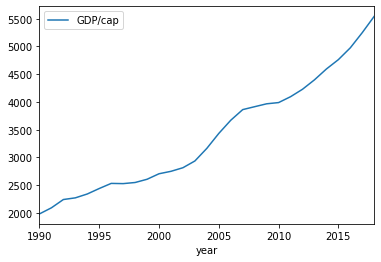

In [10]:
# weird thing for Jupyter Notebooks
%matplotlib inline

gdp_df.plot(x='year', y='GDP/cap')
plt.show()